# **washington news article summraization**

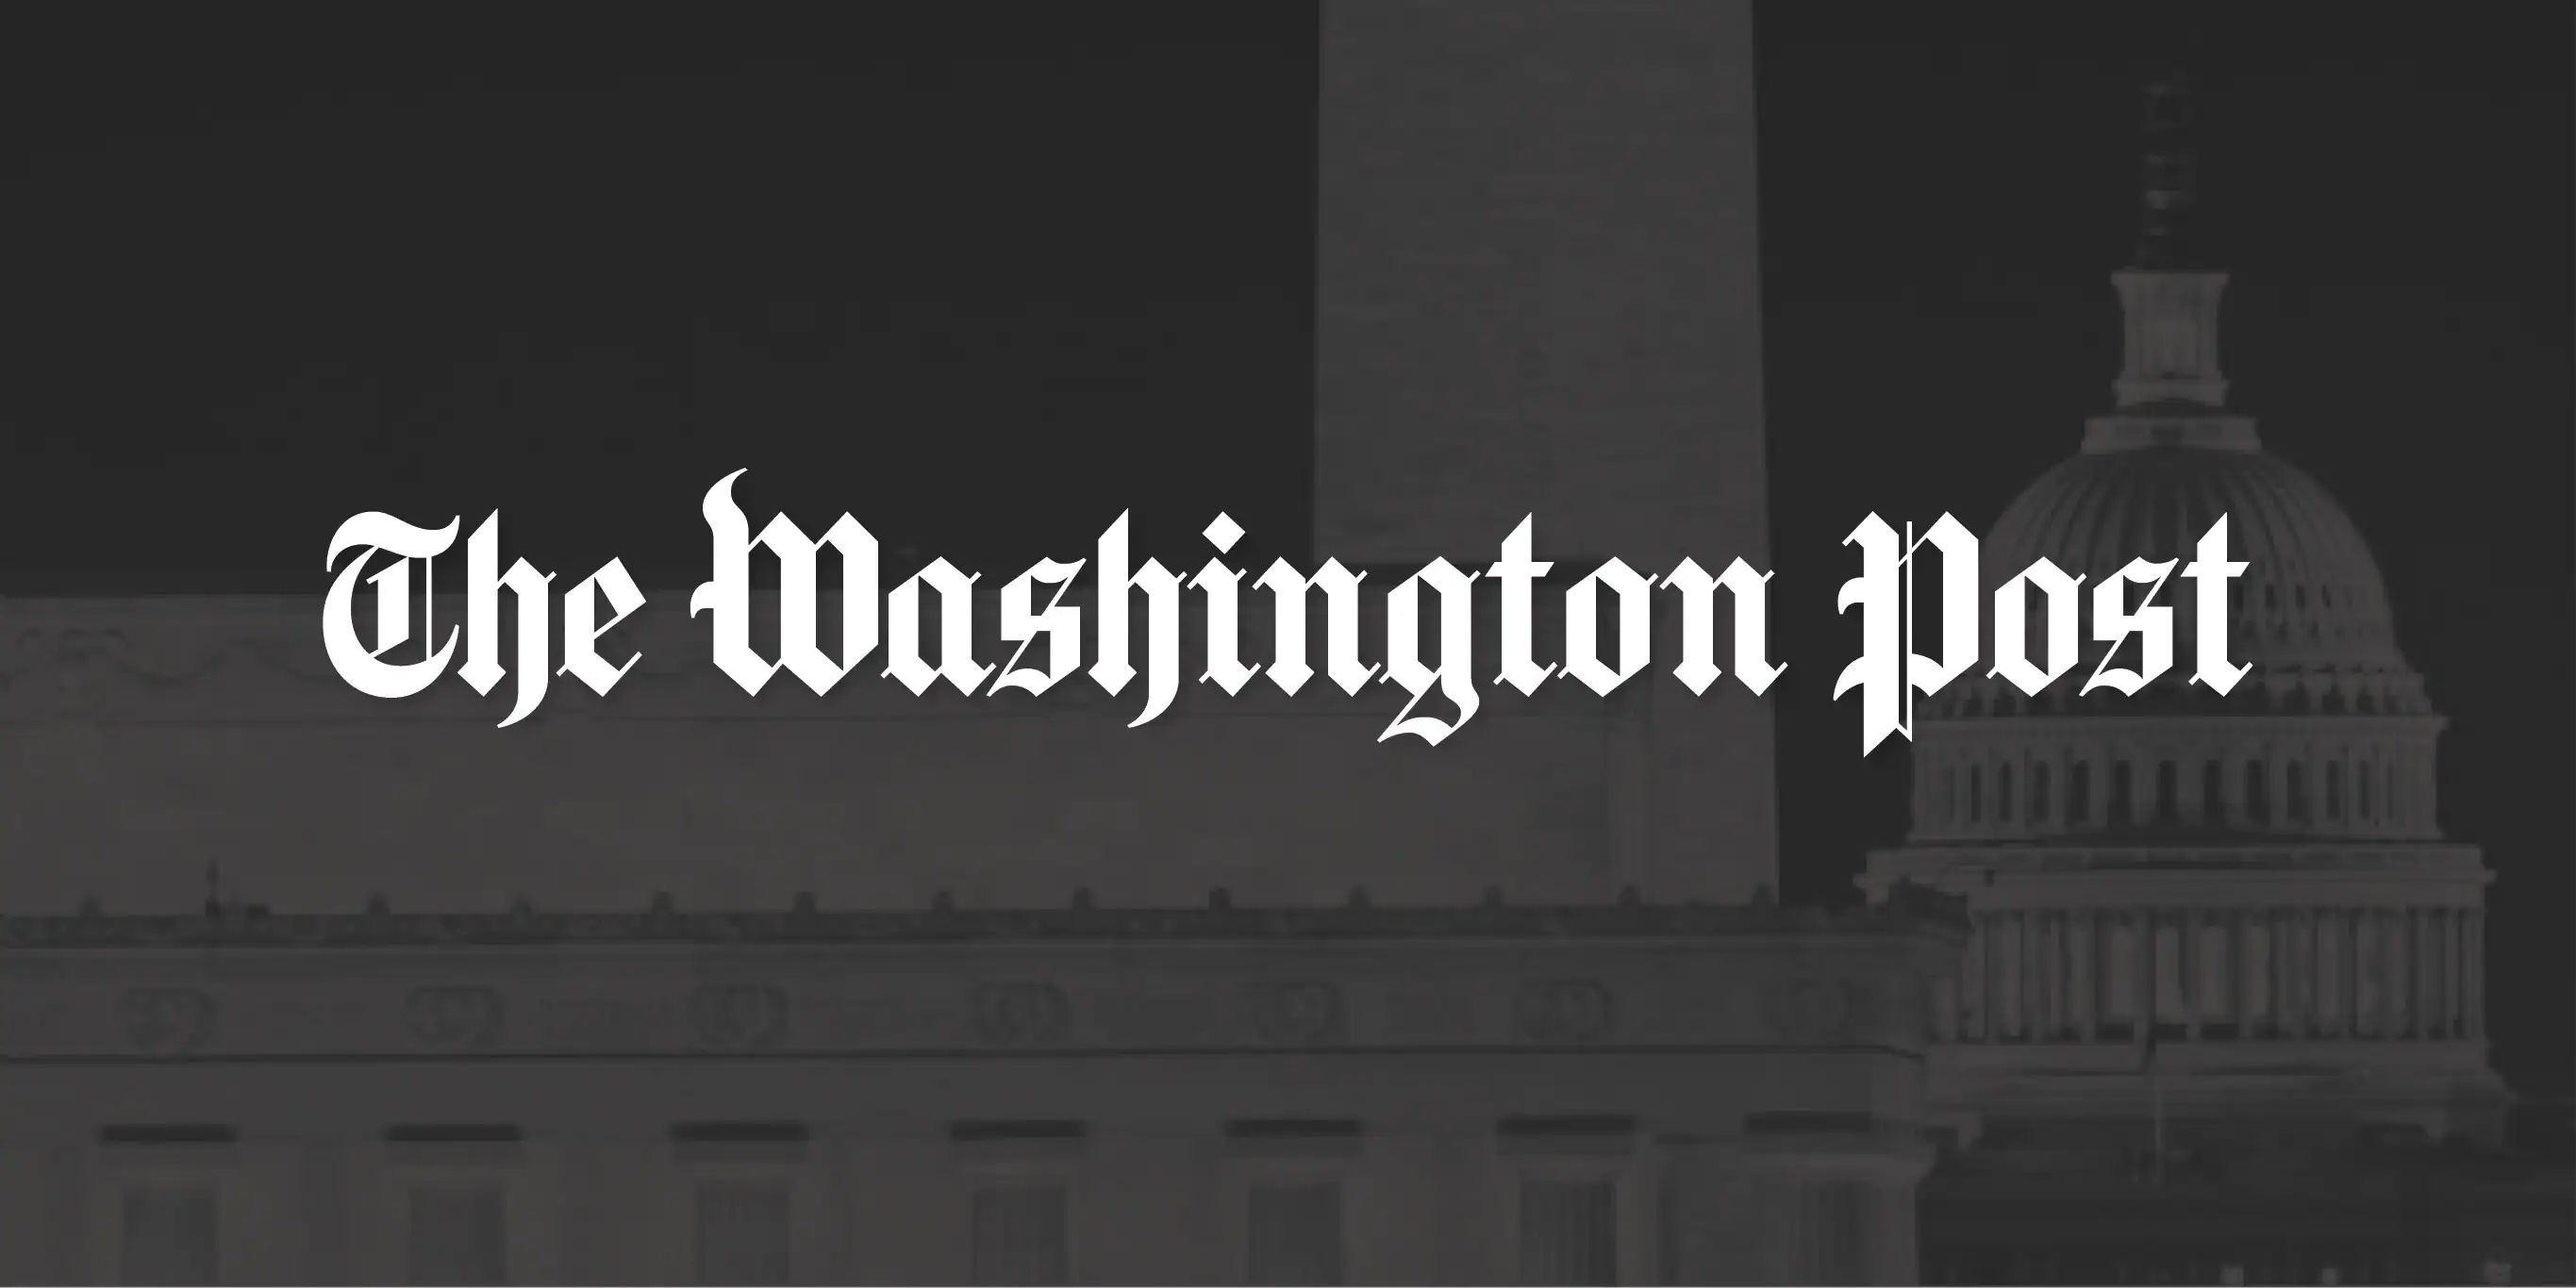

#**Text summarization**
 is the technique for generating a concise and precise summary of voluminous texts while focusing on the sections that convey useful information, and without losing the overall meaning.
this small project aims to transform lengthy news articles into shortened versions, something which could be difficult and costly to undertake if done manually.



In [ ]:
#all the required laibraries 
import heapq
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize #create tokens based on word and sentence
from nltk.probability import FreqDist
from collections import defaultdict
from heapq import nlargest
from nltk.corpus import stopwords
from string import punctuation
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **web scraping**
Web scraping is an automated method used to extract large amounts of data from websites. The data on the websites are unstructured. Web scraping helps collect these unstructured data and store it in a structured form. There are different ways to scrape websites such as online Services, APIs, or writing your code. In this project, we’ll see how to implement web scraping with python to get an article by passing the URL from the washington website. 

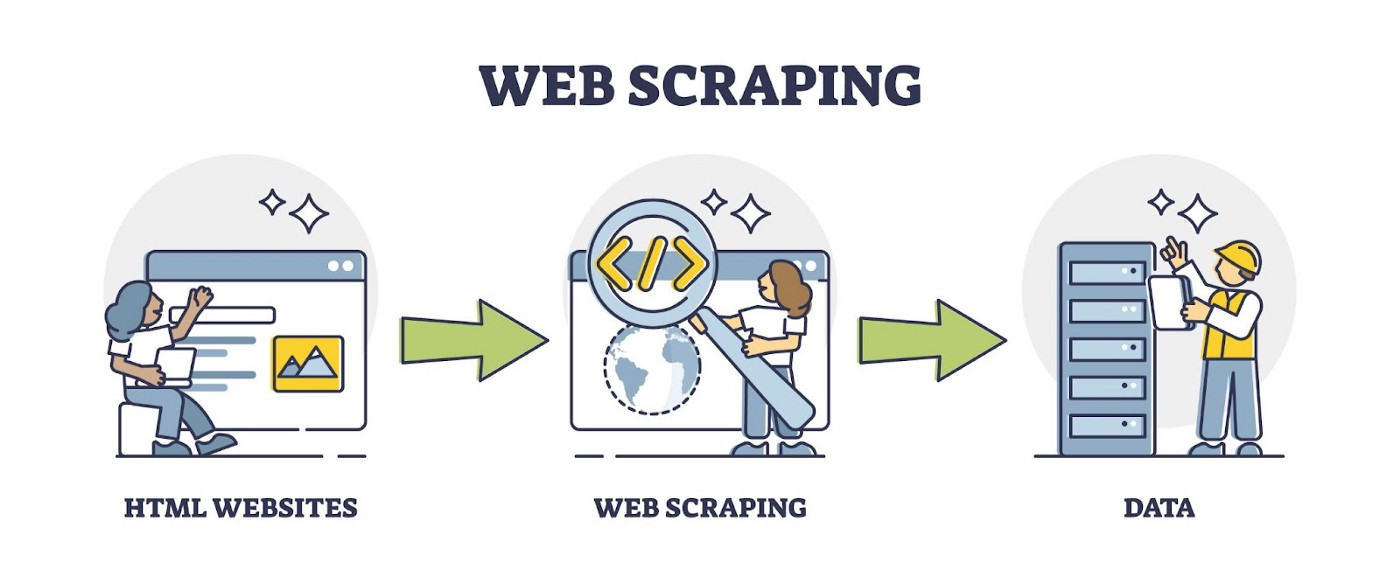

###**Libraries used for Web Scraping**
A Python is has various applications and there are different libraries for different purposes. In this project I will be using the following libraries:

1. **urllib** is a package that collects several modules for working with URLs:
> **urllib.request** for opening and reading URLs


2. **Beautiful Soup** is a Python web scraping library that allows us to parse and scrape HTML and XML pages.




In [ ]:
#web scrapping laibraires 
import urllib.request
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen


##**Function to get the article** 
This function uses to get the article from its URL.
washington's news articles are under the  tag <'article'> always .

In [ ]:
def getTextWP(url):
#, headers={'User-Agent': 'Mozilla/5.0'})

  req = Request(url)
  webpage = urlopen(req).read().decode("utf8","ignore")
  soup =BeautifulSoup(webpage,"lxml")
  text= " ".join(map(lambda p: p.text, soup.find_all("article")))
  #to combine all the articles
  #article is the key that contain the text , every web page has diffrent key represnt thier articles
  #this give as only thr first elemnt that have the tag article 
  return text


In [ ]:
text = getTextWP("https://www.washingtonpost.com/business/2022/06/20/refineries-profit-gas-prices/")
text

'A section of the shuttered Philadelphia Energy Solutions refinery in 2021. (HRP)Listen11 minComment on this storyCommentGift ArticleSharePHILADELPHIA — As the energy crunch drives record profits at American oil refineries, the owners of what had been the largest such facility in the Northeast have no regrets about tearing the place down.Share with The Post: What’s one way you’ve felt the impact of inflation?ArrowRightHilco Redevelopment Partners has been hauling out 950 miles of pipe from the former Philadelphia Energy Solutions refinery, abandoning the property’s 150-year history of processing crude oil into fuel in this city. The firm is spending hundreds of millions of dollars to convert the 1,300-acre site along the Schuylkill River into a green, high-tech campus for e-commerce and life sciences companies.“I don’t even know how to operate a refinery,” said Roberto Perez, chief executive of Hilco, which bought the property in a bankruptcy auction in 2020, a year after a massive exp

##**Summarize function**
this function wiil make series of steps :
1. making a space between the (.) and the next sentence so the sentence tokinize could work
2. break the text into lists of words
3. create a set of stop word to filter them from the text
4. create a frequency table of the words.
 
  A Python default dictionary is diffrent from regular dictionary such that if you search for a key that is not in the dictionart it will add it to the dictionary instead of throw error
5. significant score will assigned for each sentence in the article Depending on the words it contains and the frequency table.
6. finally , pick top n sentence based on the significant store then return the index of the important sentence

In [ ]:
def summarize(text,n):
  #break the text into lists of sentences
  sentsT2=sent_tokenize(text)
  assert n <= len(sentsT2) 
  #check if the text has the require number of sentence 
  word_sent = word_tokenize(text.lower())

  word_sent = list(filter(('”').__ne__, word_sent))
  word_sent = list(filter(('’').__ne__, word_sent))
  word_sent = list(filter(('“').__ne__, word_sent))
  word_sent = list(filter(('—').__ne__, word_sent))
  word_sent = list(filter(('‘').__ne__, word_sent))
  #create a set of stop word to remove them
  stopwordss=set(stopwords.words("english")+list(punctuation))
  #filter out the stop word from our text
  word_sent=[word for word in word_sent if word not in stopwordss]
  freq=FreqDist(word_sent)
  #create ranking 
  #significant score for each sentence in the article 
  #build a  dictoniray where the key is sentence and values is a score
  #using default dictionary which is diffrent from regular dictionary such that if you search for a key that is not in the dictionart it will add it to the dictionary instead of throw error
  ranking=defaultdict(int)
  for i,sent in enumerate(sentsT2):
    for w in word_tokenize(sent.lower()):
      if w in freq:
        ranking[i]+=freq[w]
  #pick top n sentence based on the significant store 
  sen_index=nlargest(n,ranking,key=ranking.get)
  #the index is not in order so we have to print the sentence iv acseding order
  return[sentsT2[i] for i in sorted(sen_index)]




  

In [ ]:
summarize(text,4)


['(HRP)Listen11 minComment on this storyCommentGift ArticleSharePHILADELPHIA — As the energy crunch drives record profits at American oil refineries, the owners of what had been the largest such facility in the Northeast have no regrets about tearing the place down.Share with The Post: What’s one way you’ve felt the impact of inflation?ArrowRightHilco Redevelopment Partners has been hauling out 950 miles of pipe from the former Philadelphia Energy Solutions refinery, abandoning the property’s 150-year history of processing crude oil into fuel in this city.',
 'Yet even at this lucrative moment for what’s left of the refining industry, a White House desperate to bring down gas prices is having little success persuading owners to expand operations, and more closures are imminent.Why an energy crisis and $5 gas aren’t spurring a green revolutionThe futility of the White House effort came through in the response to letters President Biden sent this week to the nation’s major oil companies,

## **Endnotes**
This project is considered simple as it uses only a based rules approach, summarization can be made in a more accurate and better way using the machine learning  and deep learning